In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy/notebooks/ashish_validation_train


In [3]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.path.append("../../")
from src.utils import *

sys.version

'3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:55:37) \n[Clang 14.0.6 ]'

In [4]:
%load_ext autoreload 
%autoreload 2

In [5]:
y_pred_null = pd.read_csv("../../results/null_model_results_final.csv",index_col=0)
y_pred_null["SALES_DATE"] = pd.to_datetime(y_pred_null["SALES_DATE"])
y_pred_null.head()

,Encoded_SKU_ID,SALES_DATE,predicted
0,23,2022-08-06,1
1,100,2022-08-02,2
2,121,2022-08-06,0
3,207,2022-08-03,1
4,416,2022-08-05,11


In [6]:
original_validation = pd.read_excel("../../data/Validation_Data.xlsx").drop_duplicates()

In [7]:
y_act = original_validation[["Encoded_SKU_ID","SALES_DATE","DAILY_UNITS"]].rename(columns = {"DAILY_UNITS":"actual"})
y_act.head()

,Encoded_SKU_ID,SALES_DATE,actual
0,23,2022-08-06,3
1,100,2022-08-02,2
2,121,2022-08-06,6
3,207,2022-08-03,0
4,416,2022-08-05,9


In [8]:
y_act.dtypes

Encoded_SKU_ID             int64
SALES_DATE        datetime64[ns]
actual                     int64
dtype: object

In [9]:
y_pred_null.dtypes

Encoded_SKU_ID             int64
SALES_DATE        datetime64[ns]
predicted                  int64
dtype: object

In [10]:
rmse(y_act,y_pred_null)

5.290976671399268

In [11]:
rmse_sku_null = rmse_sku(y_act,y_pred_null)

In [12]:
rmse_sku_null.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
469,91.411940,396.000000,0.230838
430,40.362642,94.714286,0.426152
50,32.671525,73.857143,0.442361
557,22.696759,33.285714,0.681877
271,16.694738,28.428571,0.587252


In [16]:
rmse_sku_null.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
533,0.377964,0.142857,2.645751
370,0.377964,0.142857,2.645751
419,0.377964,0.142857,2.645751
9,0.377964,0.142857,2.645751
337,0.377964,1.142857,0.330719


In [13]:
original_train = pd.read_csv("../../data/train_validation_marker.csv").drop_duplicates()
original_train["SALES_DATE"] = pd.to_datetime(original_train["SALES_DATE"])

common_cols = set(original_train.columns).intersection(original_validation.columns)
original_train1 = pd.concat([original_train[list(common_cols)],original_validation[list(common_cols)]])

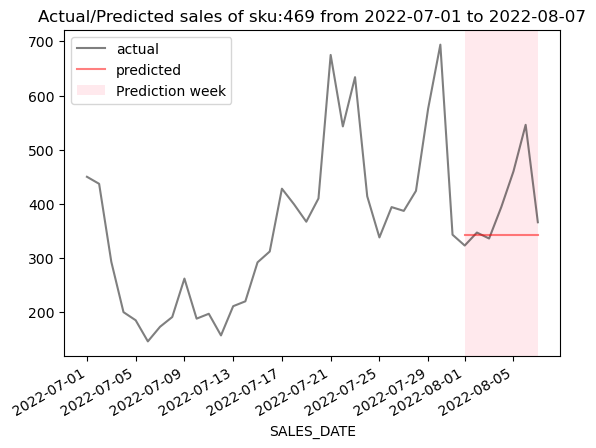

In [26]:
plot_pred_sku(original_train1,y_act, y_pred_null, 469, "2022-07-01")

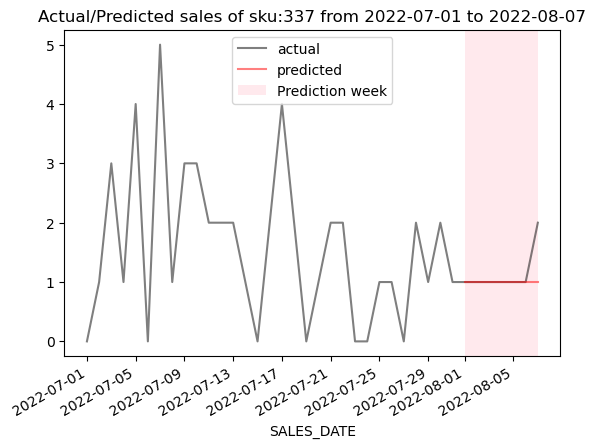

In [27]:
plot_pred_sku(original_train1,y_act, y_pred_null, 337)

### Holt RMSE specific

In [28]:
y_pred_holt = pd.read_csv("../../results/holt_rst_final.csv",index_col=0)
y_pred_holt["SALES_DATE"] = pd.to_datetime(y_pred_holt["SALES_DATE"])
y_pred_holt.head()

,SALES_DATE,predicted,Encoded_SKU_ID
0,2022-08-01,1.598060,365
1,2022-08-02,1.334868,365
2,2022-08-03,1.755911,365
3,2022-08-04,1.440121,365
4,2022-08-05,1.492759,365


In [30]:
rmse_sku_holt = rmse_sku(y_act,y_pred_holt)

In [31]:
rmse_sku_holt.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
157,46.277526,0.571429,80.985671
358,20.790315,0.285714,72.766103
147,5.025741,0.571429,8.795047
76,4.843518,0.285714,16.952313
413,1.971850,2.142857,0.920197


In [32]:
rmse_sku_holt.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
157,46.277526,0.571429,80.985671
358,20.790315,0.285714,72.766103
147,5.025741,0.571429,8.795047
76,4.843518,0.285714,16.952313
413,1.971850,2.142857,0.920197


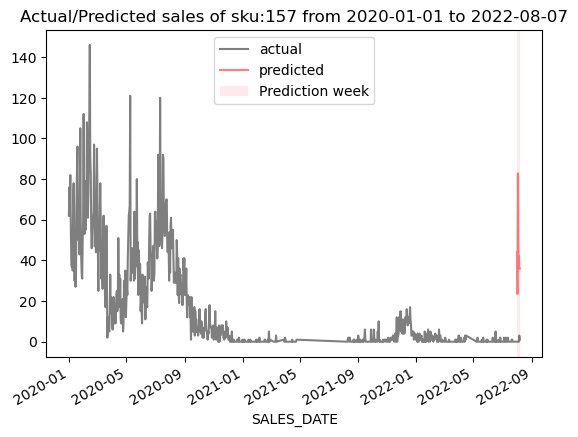

In [39]:
plot_pred_sku(original_train1,y_act, y_pred_holt, 157, "2020-01-01")

In [40]:
rmse_sku_holt.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
171,0.811962,1.000000,0.811962
248,0.799294,0.285714,2.797527
485,0.794750,0.714286,1.112649
404,0.716962,1.714286,0.418228
337,0.521113,1.142857,0.455974


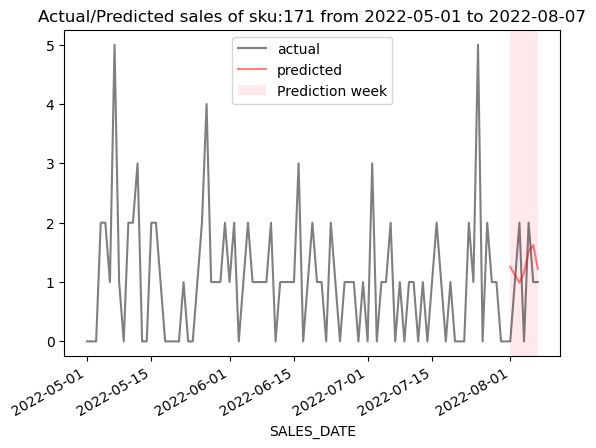

In [43]:
plot_pred_sku(original_train1,y_act, y_pred_holt, 171, "2022-05-01")